# FEC Election Results Data
Election results are stored in excel files with slightly different formats across years. Purpose of this notebook is to:
1. Combine data into one flat file
2. Only keep data on candidates who won a seat
3. Do some basic cleaning

Data was downloaded from here: https://transition.fec.gov/pubrec/electionresults.shtml

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 100

## 2014 Results

In [110]:
df_14_senate = pd.read_excel('raw/results14.xls', sheetname='2014 US Senate Results by State')
df_14_senate = df_14_senate[df_14_senate['GE WINNER INDICATOR'] == 'W']
df_14_house = pd.read_excel('raw/results14.xls', sheetname='2014 US House Results by State')
df_14_house = df_14_house[df_14_house['GE WINNER INDICATOR'] == 'W']
df_master = pd.concat([df_14_house,df_14_senate])
df_master['election_year'] = 2014

## 2012 Results

In [111]:
df_12_combined = pd.read_excel('raw/2012congresults.xls', sheetname='2012 US House & Senate Results')
df_12_combined = df_12_combined[df_12_combined['GE WINNER INDICATOR'] == 'W']
df_12_combined['election_year'] = 2012
df_master = pd.concat([df_master, df_12_combined])

## 2010 Results

In [112]:
df_10_combined = pd.read_excel('raw/results10.xls', sheetname='2010 US House & Senate Results')
df_10_combined.dropna(subset=['GENERAL %'], inplace=True)
df_10_combined['election_year'] = 2010
election_winners = df_10_combined.groupby(['STATE','DISTRICT'])['GENERAL %'].apply(lambda x: x.argmax()).tolist()
df_10_combined = df_10_combined.loc[election_winners]
df_10_combined['GE WINNER INDICATOR'] = 'W'
df_10_combined.rename(columns={'CANDIDATE NAME (Last, First)': 'CANDIDATE NAME', 
                               'DISTRICT': 'D', 
                               'GENERAL ': 'GENERAL VOTES ', 
                               'INCUMBENT INDICATOR (I)':'(I)', 
                               'PRIMARY': 'PRIMARY VOTES', 
                               'RUNOFF':'RUNOFF VOTES'}, inplace = True)
df_10_combined.drop('Unnamed: 20', axis = 1, inplace=True)
df_master = pd.concat([df_master, df_10_combined])

## 2008 Results

In [113]:
df_08_combined = pd.read_excel('raw/2008congresults.xls', sheetname='2008 House and Senate Results')
df_08_combined['GENERAL %'] = pd.to_numeric(df_08_combined['GENERAL %'], errors='coerce')
df_08_combined.dropna(subset=['GENERAL %'], inplace=True)
df_08_combined['election_year'] = 2008
election_winners = df_08_combined.groupby(['STATE','DISTRICT'])['GENERAL %'].apply(lambda x: x.argmax()).tolist()
df_08_combined = df_08_combined.loc[election_winners]
df_08_combined['GE WINNER INDICATOR'] = 'W'
df_08_combined.rename(columns={'Candidate Name (Last)': 'CANDIDATE NAME (Last)', 
                               'DISTRICT': 'D', 
                               'GENERAL ': 'GENERAL VOTES ', 
                               'INCUMBENT INDICATOR (I)':'(I)', 
                               'PRIMARY': 'PRIMARY VOTES', 
                               'RUNOFF':'RUNOFF VOTES'}, inplace = True)
#df_08_combined.drop(['GE RUNOFF','GE RUNOFF %' ], axis = 1, inplace=True)
df_master = pd.concat([df_master, df_08_combined])

## 2006 Results

In [114]:
df_06_combined = pd.read_excel('raw/results06.xls', sheetname='2006 US House & Senate Results')
df_06_combined.dropna(subset=['GENERAL %'], inplace=True)
df_06_combined['election_year'] = 2006
election_winners = df_06_combined.groupby(['STATE','DISTRICT'])['GENERAL %'].apply(lambda x: x.argmax()).tolist()
df_06_combined = df_06_combined.loc[election_winners]
df_06_combined['GE WINNER INDICATOR'] = 'W'
df_06_combined.rename(columns={'#': 1, 
                               'DISTRICT': 'D', 
                               'FEC ID': 'FEC ID#', 
                               'FIRST NAME': 'CANDIDATE NAME (First)', 
                               'LAST NAME': 'CANDIDATE NAME (Last)',
                               'GENERAL': 'GENERAL VOTES ', 
                               'INCUMBENT INDICATOR':'(I)', 
                               'PRIMARY': 'PRIMARY VOTES', 
                               'RUNOFF':'RUNOFF VOTES', 
                               'Notes (See Endnotes Tab)':'FOOTNOTES', 
                               'LAST NAME, FIRST':'CANDIDATE NAME'}, inplace = True)
df_master = pd.concat([df_master, df_06_combined])

## 2004 Results

In [121]:
df_04_combined = pd.read_excel('raw/2004congresults.xls', sheetname='2004 US HOUSE & SENATE RESULTS')
df_04_combined.dropna(subset=['GENERAL %'], inplace=True)
df_04_combined['election_year'] = 2004
election_winners = df_04_combined.groupby(['STATE','DISTRICT'])['GENERAL %'].apply(lambda x: x.argmax()).tolist()
df_04_combined = df_04_combined.loc[election_winners]
df_04_combined['GE WINNER INDICATOR'] = 'W'
df_04_combined.rename(columns={'#': 1, 
                               'DISTRICT': 'D', 
                               'FEC ID': 'FEC ID#', 
                               'FIRST NAME': 'CANDIDATE NAME (First)', 
                               'LAST NAME': 'CANDIDATE NAME (Last)',
                               'GENERAL': 'GENERAL VOTES ', 
                               'INCUMBENT INDICATOR':'(I)', 
                               'PRIMARY': 'PRIMARY VOTES', 
                               'RUNOFF':'RUNOFF VOTES', 
                               'Notes (See Endnotes Tab)':'FOOTNOTES', 
                               'LAST NAME, FIRST':'CANDIDATE NAME'}, inplace = True)
df_master = pd.concat([df_master, df_04_combined])

## 2002 Results

In [149]:
df_02_combined = pd.read_excel('raw/2002fedresults.xls', sheetname='2002 House & Senate Results')
df_02_combined['GENERAL %'] = pd.to_numeric(df_02_combined['GENERAL %'], errors='coerce')
df_02_combined.dropna(subset=['GENERAL %'], inplace=True)
df_02_combined['election_year'] = 2002
election_winners = df_02_combined.groupby(['STATE','DISTRICT'])['GENERAL %'].apply(lambda x: x.argmax()).tolist()
df_02_combined = df_02_combined.loc[election_winners]
df_02_combined['GE WINNER INDICATOR'] = 'W'
df_02_combined.rename(columns={'DISTRICT': 'D', 
                               'FEC ID': 'FEC ID#', 
                               'FIRST NAME': 'CANDIDATE NAME (First)', 
                               'LAST NAME': 'CANDIDATE NAME (Last)',
                               'LAST NAME,  FIRST': 'CANDIDATE NAME',
                               'GENERAL RESULTS': 'GENERAL VOTES ', 
                               'INCUMBENT INDICATOR':'(I)', 
                               'PRIMARY RESULTS': 'PRIMARY VOTES', 
                               'RUNOFF RESULTS':'RUNOFF VOTES', 
                               'NOTES (See Endnotes Page)':'FOOTNOTES', 
                               'LAST NAME, FIRST':'CANDIDATE NAME',
                               'GENERAL RUNOFF %':'GE RUNOFF %',
                               'GENERAL RUNOFF RESULTS':'GE RUNOFF',
                               'STATE':'STATE ABBREVIATION'}, inplace = True)
df_master = pd.concat([df_master, df_02_combined])

## Standardize and Export

In [151]:
df_master.shape

(3378, 30)

In [152]:
df_master.election_year.value_counts()

2014    517
2012    482
2010    479
2006    478
2008    476
2002    476
2004    470
Name: election_year, dtype: int64

In [ ]:
from string import ascii_letters
new_cols = []
for col in df_master.columns:
    col = str(col)
    col = col.replace('%', 'percent')
    col = col.replace(' ', '_')
    col = "".join([x for x in col if x in ascii_letters + '1234567890_'])
    col = col.lower()
    if col == 'i':
        col = 'incumbent'
    if col == 'd':
        col = 'district'
    new_cols.append(col)
df_master.rename(columns=dict(zip(df_master.columns, new_cols)), inplace=True)

df_master['state'] = df_master.state.replace({'District of Columbi': 'District of Columbia', 
                                              'TX': 'Texas'})
df_master['incumbent'] = df_master.incumbent.replace({'(I)':1, ' (I)':1})
df_master.incumbent.fillna(0, inplace=True)

In [3]:
df_master = pd.read_csv('fec_election_results.csv', encoding='latin1')

In [192]:
df_master['party_cleaner'] = df_master.party.replace({'REP': 'R','DEM': 'D'})

In [129]:
df_master.head()

,1,state_abbreviation,state,district,fec_id,incumbent,candidate_name_first,candidate_name_last,candidate_name,total_votes,party,primary_votes,primary_percent,runoff_votes,runoff_percent,general_votes_,general_percent,ge_runoff_election_votes_la,ge_runoff_election_percent_la,combined_ge_party_totals_ct_ny_sc,combined_percent_ct_ny_sc,ge_winner_indicator,footnotes,election_year,ge_runoff,ge_runoff_percent,combined_ge_party_totals_ct_ny,combined_percent_ct_ny,combined_ge_party_totals_ny_sc,combined_percent_ny_sc,party_cleaner
0,2.0,AL,Alabama,01,H4AL01123,1.0,Bradley,Byrne,"Byrne, Bradley",NaN,R,Unopposed,NaN,NaN,NaN,103758,0.681569,NaN,NaN,NaN,NaN,W,NaN,2014,NaN,NaN,NaN,NaN,NaN,NaN,R
1,7.0,AL,Alabama,02,H0AL02087,1.0,Martha,Roby,"Roby, Martha",NaN,R,Unopposed,NaN,NaN,NaN,113103,0.673425,NaN,NaN,NaN,NaN,W,NaN,2014,NaN,NaN,NaN,NaN,NaN,NaN,R
2,12.0,AL,Alabama,03,H2AL03032,1.0,Mike,Rogers,"Rogers, Mike",NaN,R,50372,0.7589459251781652,NaN,NaN,103558,0.661205,NaN,NaN,NaN,NaN,W,NaN,2014,NaN,NaN,NaN,NaN,NaN,NaN,R
3,19.0,AL,Alabama,04,H6AL04098,1.0,Robert,Aderholt,"Aderholt, Robert",NaN,R,Unopposed,NaN,NaN,NaN,132831,0.985744,NaN,NaN,NaN,NaN,W,NaN,2014,NaN,NaN,NaN,NaN,NaN,NaN,R
4,23.0,AL,Alabama,05,H0AL05163,1.0,Mo,Brooks,"Brooks, Mo",NaN,R,49117,0.8031559152971957,NaN,NaN,115338,0.744241,NaN,NaN,NaN,NaN,W,NaN,2014,NaN,NaN,NaN,NaN,NaN,NaN,R


In [48]:
columns = ['fec_id','election_year','primary_votes','primary_percent','general_votes_', 'general_percent']
df_limited = df_master[columns]
df_limited['primary_percent'] = pd.to_numeric(df_limited.primary_percent.fillna(df_limited.primary_votes).replace({'Unopposed':1}), errors='coerce')
df_limited.loc[df_limited['primary_percent'] > 1,'primary_percent'] = np.nan
df_limited['primary_votes'] = pd.to_numeric(df_limited.primary_votes, errors='coerce')
df_limited['general_votes'] = pd.to_numeric(df_limited.general_votes_, errors='coerce')
df_limited = df_limited.pivot_table(index='fec_id', columns='election_year')
df_limited.to_csv('fec_election_results_wide.csv')

C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [62]:
df_test = pd.read_csv('fec_election_results_wide.csv', header=[0,1], index_col=0)

## Check if has predictive potential

In [ ]:
from congress import Congress
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline

In [ ]:
path = 'c:/Users/Steve/Documents/mids/w_210/data/member/'
cw = pd.read_csv(path + 'fec_cid_cw.csv')

In [118]:
congress = Congress('NGLoQNiF7aiAHB6vL1XGvdSQ7KB0CbPWxkLNv5Cz')
members = congress.members.fetch('114/house/members.json')
members = pd.DataFrame(members['members'])
members.to_csv(path + 'members_114.csv', index = False)
members = members[['fec_candidate_id', 'votes_with_party_pct']]

In [119]:
elec_2014 = pd.concat([df_limited['primary_percent'][2014], 
                       df_limited['general_percent'][2014]], 
                      axis = 1).reset_index()
elec_2014.columns = ['fec_candidate_id','primary_percent','general_percent']
members = pd.merge(members, elec_2014, how = 'left', on='fec_candidate_id')

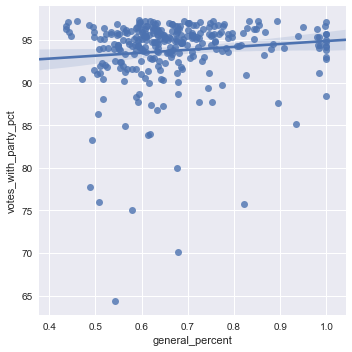

In [130]:
sns.lmplot(data=members[members.general_percent > .4], x = 'general_percent', y = 'votes_with_party_pct')

In [128]:
members[members.general_percent < .4]

,fec_candidate_id,votes_with_party_pct,primary_percent,general_percent
72,H8NY29032,94.51,1.000000,0.236809
82,H2CT02112,95.11,NaN,0.311377
98,H0CT03072,97.00,NaN,0.334585
122,H2CT05131,95.52,NaN,0.266206
145,H0NY20095,76.69,1.000000,0.214841
178,H4NY27076,96.90,1.000000,0.340739
180,H8CT04172,94.05,NaN,0.134404
193,H0NY02085,95.71,1.000000,0.182574
208,H4NY24073,85.30,1.000000,0.198228
217,H2NY03089,90.60,1.000000,0.227702


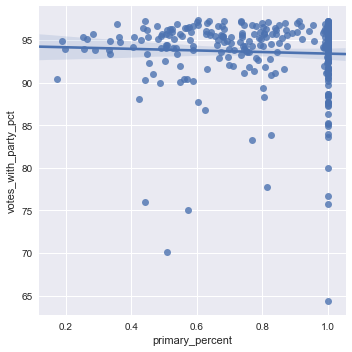

In [123]:
sns.lmplot(data=members, x = 'primary_percent', y = 'votes_with_party_pct')

In [131]:
results = smf.ols('votes_with_party_pct ~ primary_percent + general_percent', data = members[members.general_percent > .4]).fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     votes_with_party_pct   R-squared:                       0.014
Model:                              OLS   Adj. R-squared:                  0.007
Method:                   Least Squares   F-statistic:                     1.983
Date:                  Sat, 28 Oct 2017   Prob (F-statistic):              0.140
Time:                          23:57:25   Log-Likelihood:                -810.29
No. Observations:                   286   AIC:                             1627.
Df Residuals:                       283   BIC:                             1638.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          91.

In [132]:
results = smf.ols('votes_with_party_pct ~ general_percent', data = members[members.general_percent > .4]).fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     votes_with_party_pct   R-squared:                       0.012
Model:                              OLS   Adj. R-squared:                  0.008
Method:                   Least Squares   F-statistic:                     3.497
Date:                  Sun, 29 Oct 2017   Prob (F-statistic):             0.0625
Time:                          17:26:30   Log-Likelihood:                -829.86
No. Observations:                   294   AIC:                             1664.
Df Residuals:                       292   BIC:                             1671.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          91.

In [105]:
df_limited['primary_votes'][2014]

fec_id
 H6WA03135         NaN
H0AL02087          NaN
H0AL05049          NaN
H0AL05163      49117.0
H0AL07060          NaN
H0AL07086      74953.0
H0AR01083          NaN
H0AR02107          NaN
H0AR03055          NaN
H0AR03055          NaN
H0AR04038          NaN
H0AS00018          NaN
H0AZ01184          NaN
H0AZ01259          NaN
H0AZ01259      65354.0
H0AZ03362          NaN
H0CA03078      51878.0
H0CA10073      59605.0
H0CA10149      54672.0
H0CA11022          NaN
H0CA14042          NaN
H0CA15148      43607.0
H0CA17045          NaN
H0CA19173      44237.0
H0CA27085      46004.0
H0CA31087          NaN
H0CA32101      39915.0
H0CA33117      47639.0
H0CA33117          NaN
H0CA45012          NaN
                ...   
S8CT00022          NaN
S8DE00012          NaN
S8DE00079          NaN
S8FL00166          NaN
S8ID00027          NaN
S8ID00092          NaN
S8ID00092     119209.0
S8IN00049          NaN
S8KY00118          NaN
S8MI00158          NaN
S8MI00281          NaN
S8MN00438          NaN
S8MN